In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np

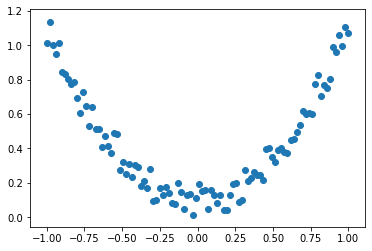

In [5]:
import matplotlib.pyplot as plt #python的绘图库
#matplotlib inline
x = torch.linspace(-1,1,100) #在[-1,1]间等距采100个点
y = x.pow(2)+0.2*torch.rand(x.size()) #对每个点的数值取平方，加上一个噪声

#将上面产生的(x,y)以散点图的形式画在二维平面
plt.scatter(x.data.numpy(),y.data.numpy())
plt.show()

In [10]:

#定义模型的类
class Net(nn.Module): #继承nn.Module后，模型能够被训练(并不只是继承nn.Module才行)
    def __init__(self,dim_input,dim_hidden,dim_output):
        super(Net,self).__init__() #调用Net父类，即nn.Module的初始化方法。这一步是必须的
        #下面对模型的结构进行定义
        self.N = nn.Sequential(
            nn.Linear(dim_input,dim_hidden),
            nn.ReLU(),
            nn.Linear(dim_hidden,dim_output)
        )
        #nn.Sequential是一个容器，传入的张量将会被逐个执行容器内函数
        #如nn.Sequential(f1,f2,f3)(x)，等价于f3(f2(f1(x)))
        #nn.Linear(dim_in,dim_out)指定了一个线性映射
        #将dim_in维的输入乘上一个变换矩阵、加上截距，转换为dim_out维的输出
        #nn.ReLU()即常用的ReLU非线性变换
    def forward(self, x):
        return self.N(x)
        
#实例化一个模型，我们的数据输入输出都是1维，所以dim_input,dim_output都为1
#中间的隐藏单元我们指定为10，即dim_hidden=10

net = Net(dim_input=1,dim_hidden=10,dim_output=1)
print(net) #查看网络的结构

Net(
  (N): Sequential(
    (0): Linear(in_features=1, out_features=10, bias=True)
    (1): ReLU()
    (2): Linear(in_features=10, out_features=1, bias=True)
  )
)


In [11]:
x = x.view(-1,1) #模型中使用的nn.Linear只能对形如(B,L)的张量进行计算，L代表输入的维度，B代表输入的个数
y = y.view(-1,1) #对应作调整，使得能够计算损失

#定义训练器
optimizer = torch.optim.SGD(net.parameters(),lr=0.2)
#torch.optim中包含了许多训练算法，SGD即stochastic gradient descent（随机梯度下降）
#SGD第一个参数是训练的对象，这里是对模型的参数训练所以填入net.parameters()
#SGD第二个参数是每次靠近的距离，我们指定为0.2，若结果不理想再作调整

#定义损失计算方式
#上一节教程中我们给出了一个最常见的损失计算方式，对其做平均即为常用的均方差损失(mean square error)
criterion = nn.MSELoss()

#正如一直所说的，训练是以迭代的方式进行的，不断地调整参数
#设定迭代次数为100

for epoch in range(100):
    out = net(x) #模型用当前的参数对输入进行变换，得到输出
    loss = criterion(out,y) #计算模型输出与预期输出的差距

    optimizer.zero_grad() #清空上次的步进方向
    loss.backward() #根据当前损失计算本次迭代的步进方向
    optimizer.step() #进行一次步进


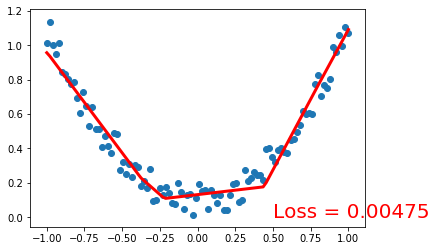

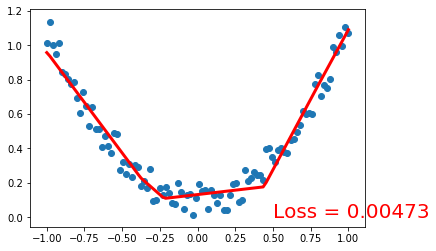

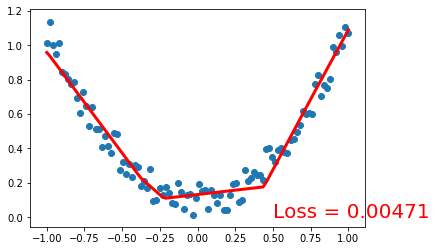

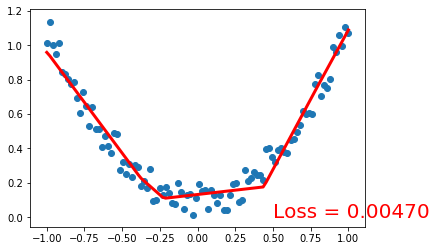

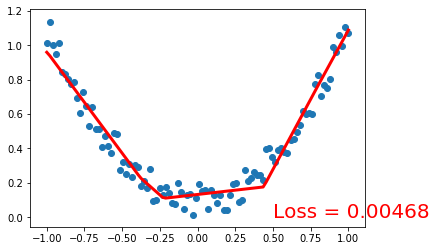

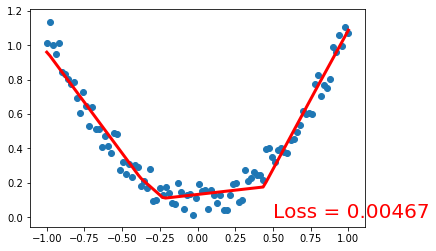

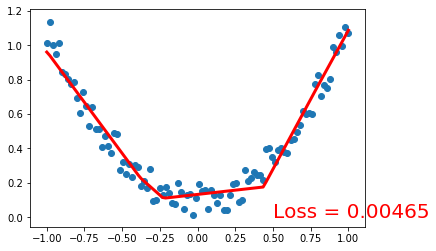

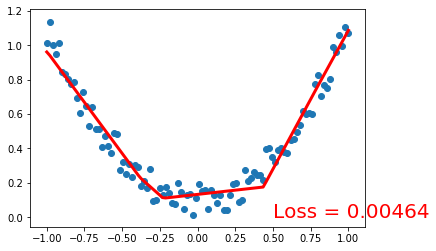

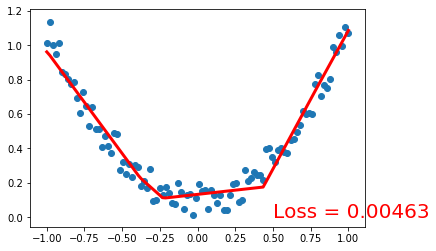

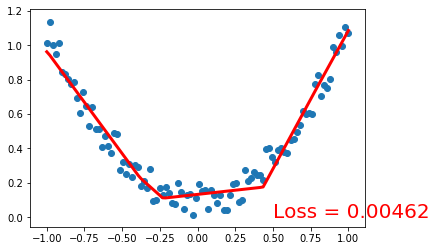

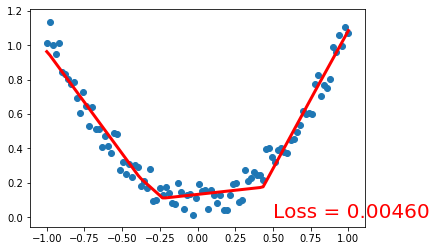

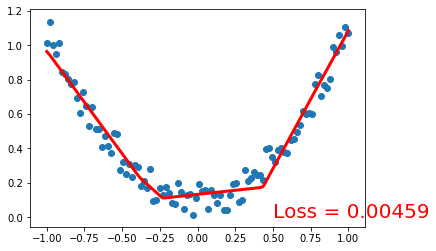

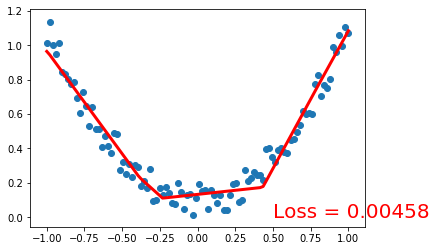

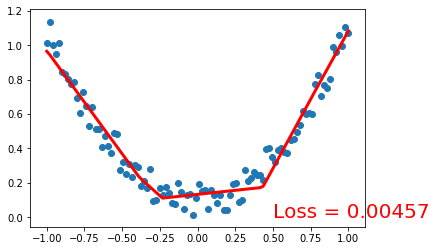

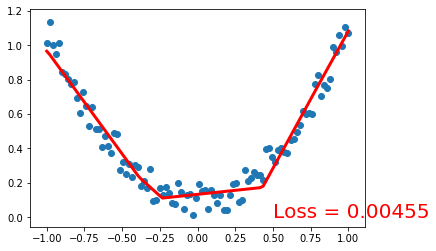

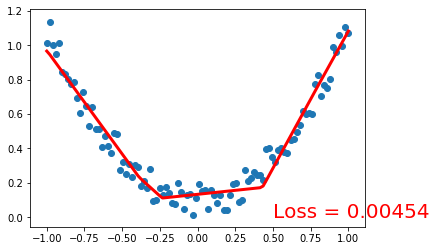

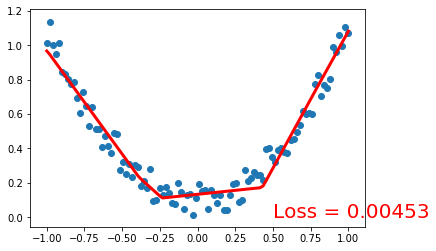

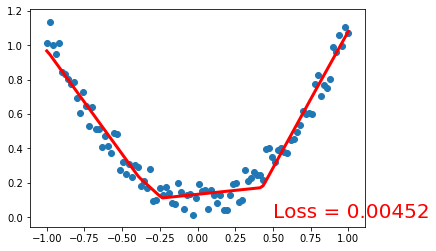

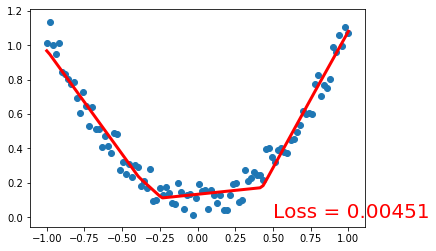

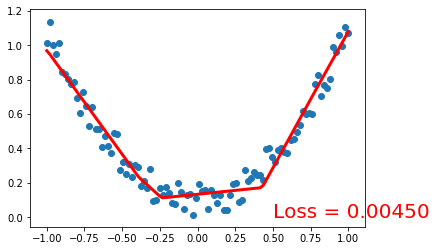

In [16]:
import matplotlib.pyplot as plt
plt.ion()
plt.show()

for epoch in range(100):
    out = net(x) #模型用当前的参数对输入进行变换，得到输出
    loss = criterion(out,y) #计算模型输出与预期输出的差距
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    
    if epoch%5 == 0: #每五次迭代绘制一次
        plt.cla() #清除活动轴
        plt.scatter(x.data.numpy(),y.data.numpy()) #绘制原始数据散点图
        plt.plot(x.data.numpy(),out.data.numpy(),'r-',lw=3) #绘制模型代表的映射
        #文本显示目前的损失
        plt.text(0.5,0,'Loss = %.5f'%loss.data.numpy(),fontdict={'size':20,'color':'red'}) 
        plt.pause(0.2) #停留0.2s